<a href="https://colab.research.google.com/github/2303A51820/data-mining/blob/main/Lab_6_1820.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
  #create a synthetic dataset
  np.random.seed(42)
  data=np.random.normal(0,1,100)  #Normal distribution
  outliers=np.random.uniform(5,10,5)   #artificial outliners

In [8]:
data_with_outliers=np.concatenate([data,outliers])

df=pd.DataFrame(data_with_outliers,columns=['value'])

Q1=df['value'].quantile(0.25)
Q3=df['value'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
print(lower_bound)
print(upper_bound)

-2.3232332563637335
2.372622015963629


In [4]:
outliers_iqr=df[(df['value']<lower_bound) | (df['value']>upper_bound)]

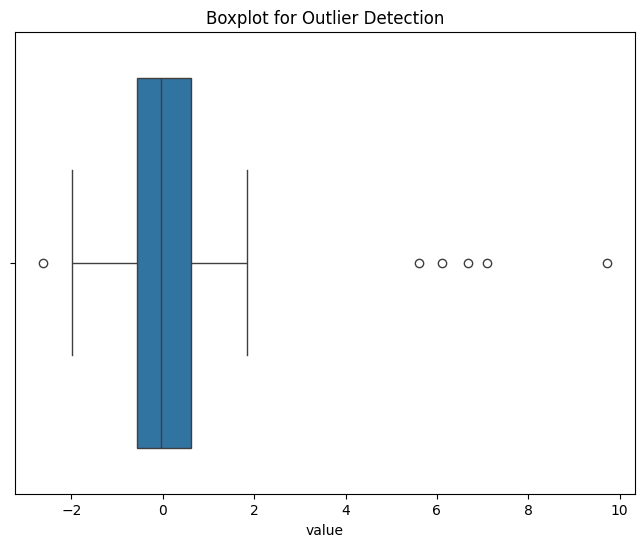

In [12]:
z_scores=stats.zscore(df['value'])
outliers_zscore=df[np.abs(z_scores)>3]

plt.figure(figsize=(8,6))
sns.boxplot(x=df['value'])
plt.title('Boxplot for Outlier Detection')
plt.show()

In [22]:
df_capped=df.copy()
df_capped['value']=np.clip(df_capped['value'],lower_bound,upper_bound)
print(df)

        value
0    0.496714
1   -0.138264
2    0.647689
3    1.523030
4   -0.234153
..        ...
100  7.087055
101  6.110539
102  5.599327
103  6.688076
104  9.714549

[105 rows x 1 columns]


In [26]:
df_removed=df.copy()
df_removed=df_removed[(df_removed['value']>=lower_bound) &
(df_removed['value']<=upper_bound)]
print(df_removed)

       value
0   0.496714
1  -0.138264
2   0.647689
3   1.523030
4  -0.234153
..       ...
95 -1.463515
96  0.296120
97  0.261055
98  0.005113
99 -0.234587

[99 rows x 1 columns]


In [25]:
df_imputed=df.copy()
median_value=df_imputed['value'].median()
df_imputed['value']=np.where((df_imputed['value']<lower_bound) |
(df_imputed['value']>upper_bound),median_value,df_imputed['value'])
print(df_imputed)

        value
0    0.496714
1   -0.138264
2    0.647689
3    1.523030
4   -0.234153
..        ...
100 -0.035826
101 -0.035826
102 -0.035826
103 -0.035826
104 -0.035826

[105 rows x 1 columns]
